<h1 align="center">An Investigation on COVID-19 Cases and Deaths in The United States</h1>

<h3 align="left">Description:</h3>
<p>The data set was obtained from data.gov. It compiles the COVID-19 case and death counts daily online. This is based on the most recent figures released by the different states, territories and other jurisdictions in the United State of America. This data set of “United States COVID-19 Cases and Deaths by State over Time” combines this information. However, the data generally depend on the jurisdictions’ precise and on-time reporting.</p>

In [2]:
pip install -U ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=a5257031d6ffc8f130540912cab3f8a8eae3c228de455b0a3af41df563d1d7c5
  Stored in directory: c:\users\ssajasa\appdata\local\pip\cache\wheels\d8\2d\fc\c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as ps

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data to a variable called Covid19_data
covid = pd.read_csv("Covid19_Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv")

In [5]:
covid

,submission_date,state,total_cases,confirmed_cases,probable _cases,new_cases,probable_new_case,total_death,confirmed_death,probable_death,new_death,probable_new_death,created_at,consent_cases,consent_deaths
0,3/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,3/12/2021 15:20,Agree,NaN
1,12/1/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/2/2021 14:35,Agree,Not agree
2,1/2/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,1/3/2022 15:18,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 0:00,Agree,Agree
4,5/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,5/31/2022 13:20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60055,2/9/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,2/11/2021 0:00,Not agree,Not agree
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 0:00,Not agree,Not agree
60057,8/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,8/19/2020 0:00,NaN,Not agree
60058,6/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,6/19/2020 0:00,Agree,Agree


In [6]:
covid.columns

Index(['submission_date', 'state', 'total_cases', 'confirmed_cases',
       'probable _cases', 'new_cases', 'probable_new_case', 'total_death',
       'confirmed_death', 'probable_death', 'new_death', 'probable_new_death',
       'created_at', 'consent_cases', 'consent_deaths'],
      dtype='object')

In [7]:
covid.rename(columns={'probable _cases':'probable_cases'},inplace=True)
covid.head()

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_cases,probable_new_case,total_death,confirmed_death,probable_death,new_death,probable_new_death,created_at,consent_cases,consent_deaths
0,3/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,3/12/2021 15:20,Agree,NaN
1,12/1/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/2/2021 14:35,Agree,Not agree
2,1/2/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,1/3/2022 15:18,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 0:00,Agree,Agree
4,5/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,5/31/2022 13:20,NaN,NaN


In [8]:
covid['state'].value_counts()

KS     1001
ND     1001
LA     1001
KY     1001
MD     1001
FSM    1001
MI     1001
CT     1001
NJ     1001
NE     1001
DE     1001
VA     1001
OR     1001
MN     1001
AZ     1001
WY     1001
NV     1001
VT     1001
WI     1001
CA     1001
NC     1001
IL     1001
DC     1001
MO     1001
MT     1001
RI     1001
ME     1001
NH     1001
ID     1001
SC     1001
AR     1001
CO     1001
OK     1001
AS     1001
AL     1001
AK     1001
RMI    1001
PR     1001
PW     1001
NM     1001
UT     1001
SD     1001
OH     1001
NYC    1001
GU     1001
NY     1001
MA     1001
MP     1001
GA     1001
PA     1001
TX     1001
MS     1001
WA     1001
HI     1001
TN     1001
IN     1001
FL     1001
WV     1001
IA     1001
VI     1001
Name: state, dtype: int64

In [9]:
covid.dropna(inplace=True)

In [10]:
covid.head()

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_cases,probable_new_case,total_death,confirmed_death,probable_death,new_death,probable_new_death,created_at,consent_cases,consent_deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 0:00,Agree,Agree
5,5/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,5/18/2020 16:01,Agree,Agree
7,9/4/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,9/4/2021 0:00,Agree,Agree
10,1/1/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,1/3/2022 13:55,Agree,Agree
12,4/3/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0,4/4/2021 13:43,Agree,Agree


In [11]:
covid.tail()

,submission_date,state,total_cases,confirmed_cases,probable_cases,new_cases,probable_new_case,total_death,confirmed_death,probable_death,new_death,probable_new_death,created_at,consent_cases,consent_deaths
60044,9/4/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0,9/5/2022 13:29,Agree,Agree
60046,2/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,2/20/2020 0:00,Agree,Agree
60048,9/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0,9/27/2021 13:21,Agree,Agree
60058,6/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,6/19/2020 0:00,Agree,Agree
60059,5/7/2022,MA,1779829,1638144.0,141685.0,0,0.0,20334,19198.0,1136.0,0,0.0,5/9/2022 13:14,Agree,Agree


In [12]:
covid19 = covid.drop(columns=['submission_date','created_at','new_cases','probable_new_case','new_death','probable_new_death','consent_cases','consent_deaths'])

In [13]:
covid19.head()

,state,total_cases,confirmed_cases,probable_cases,total_death,confirmed_death,probable_death
3,AL,841461,620483.0,220978.0,16377,12727.0,3650.0
5,RMI,0,0.0,0.0,0,0.0,0.0
7,PR,173967,144788.0,29179.0,2911,2482.0,429.0
10,UT,636992,636992.0,0.0,3787,3635.0,152.0
12,OH,1024011,866822.0,157189.0,18646,18646.0,0.0


In [14]:
covid19.tail()

,state,total_cases,confirmed_cases,probable_cases,total_death,confirmed_death,probable_death
60044,MS,913049,492258.0,420791.0,12794,8425.0,4369.0
60046,AL,0,0.0,0.0,0,0.0,0.0
60048,RMI,4,4.0,0.0,0,0.0,0.0
60058,MS,24223,24038.0,185.0,1191,1172.0,19.0
60059,MA,1779829,1638144.0,141685.0,20334,19198.0,1136.0


In [15]:
print(f'Data Frame Shape (rows, columns): {covid19.shape}')

Data Frame Shape (rows, columns): (27977, 7)


In [16]:
covid19.describe()

,total_cases,confirmed_cases,probable_cases,total_death,confirmed_death,probable_death
count,2.797700e+04,2.797700e+04,27977.000000,27977.000000,27977.000000,27977.000000
mean,6.998784e+05,5.961391e+05,103739.338099,10402.334418,9199.448583,1202.885835
std,8.503457e+05,7.506521e+05,152734.577584,12098.881484,11040.241549,1641.852397
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.951400e+04,5.210600e+04,31.000000,1137.000000,1079.000000,0.000000
50%,3.603210e+05,3.041710e+05,27901.000000,5154.000000,4686.000000,319.000000
75%,1.006327e+06,8.695900e+05,148134.000000,16556.000000,14287.000000,1983.000000
max,4.885289e+06,4.640489e+06,763762.000000,71408.000000,71408.000000,7889.000000


In [17]:
covid19 ['state'].value_counts()

AL     1001
MP     1001
ME     1001
VA     1001
DE     1001
FSM    1001
CO     1001
MI      962
NYC     961
NC      960
PR      959
MS      959
KY      956
TN      950
ID      917
OH      917
WY      917
CT      914
WI      913
MT      913
IL      913
OR      913
AZ      913
GA      912
RMI     912
UT      911
MA      820
OK      776
NJ      661
CA      634
NE      407
Name: state, dtype: int64

In [18]:
len(covid19.confirmed_death.unique())

12585

<AxesSubplot:>

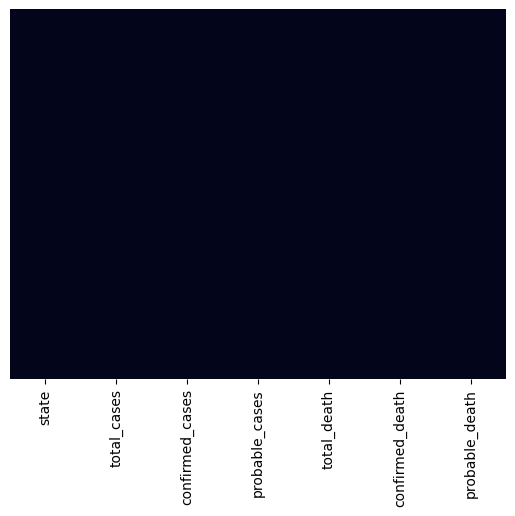

In [19]:
sns.heatmap(covid19.isnull(),yticklabels=False,cbar=False)

In [20]:
Sum = covid19.isnull().sum()
Percentage = (covid19.isnull().sum()/covid19.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
state,0,0.0
total_cases,0,0.0
confirmed_cases,0,0.0
probable_cases,0,0.0
total_death,0,0.0
confirmed_death,0,0.0
probable_death,0,0.0


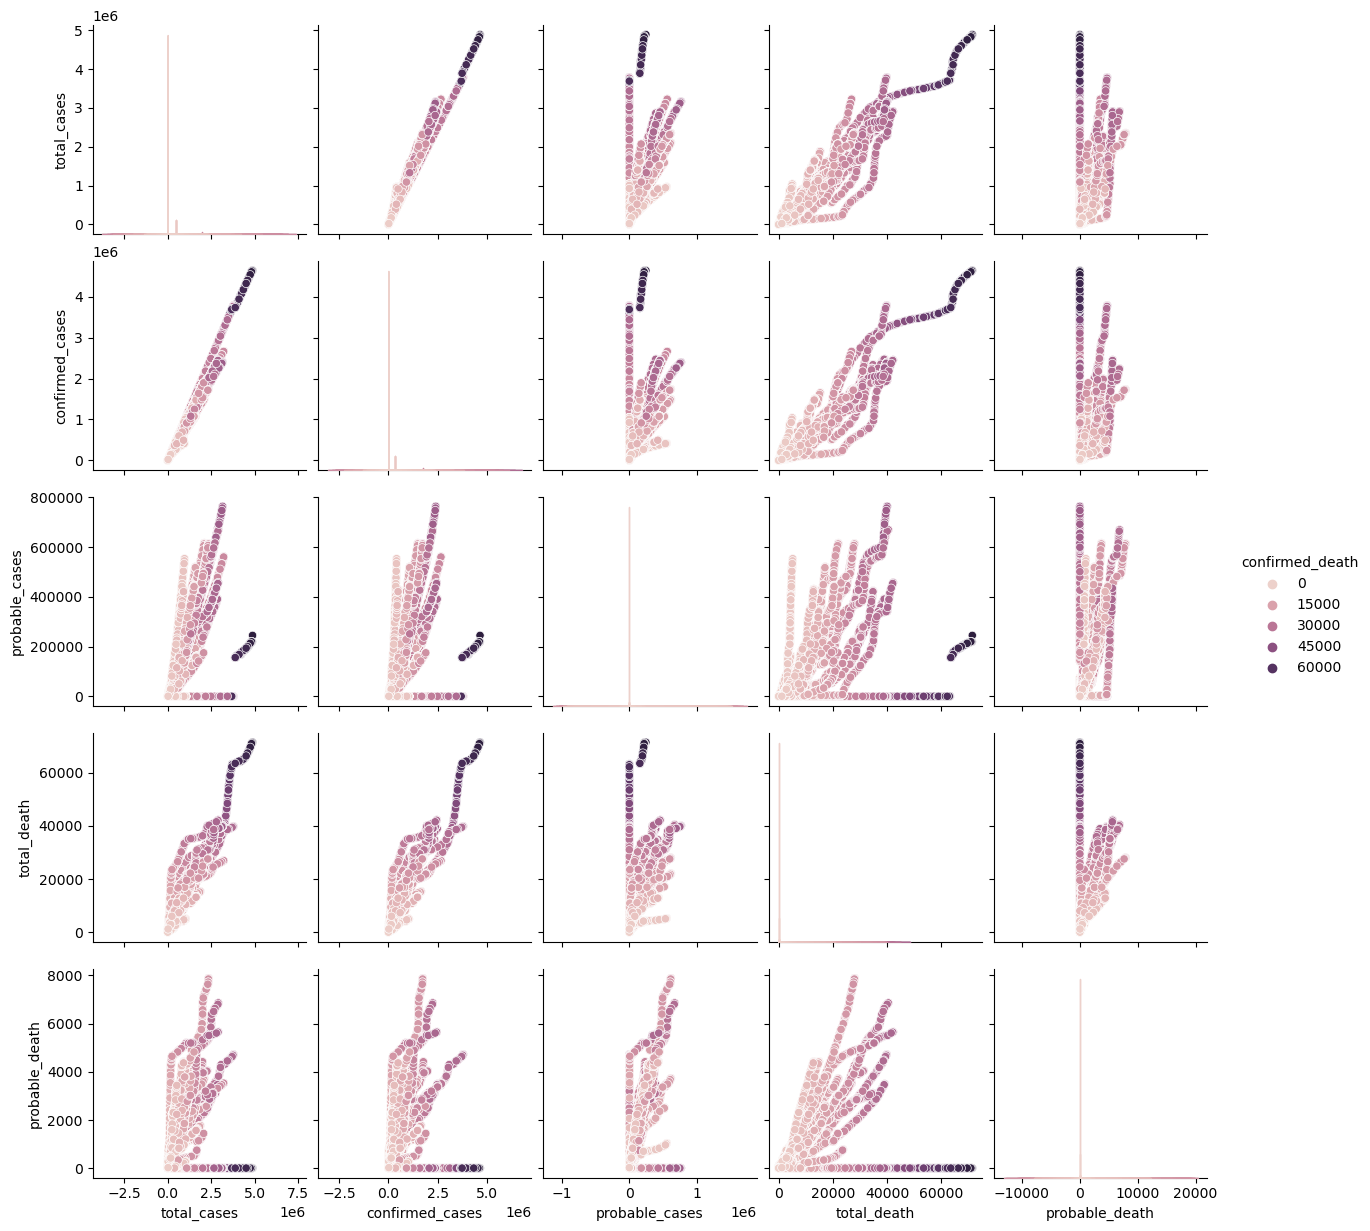

In [21]:
sns.pairplot(covid19, hue="confirmed_death")

Text(0, 0.5, 'correlation')

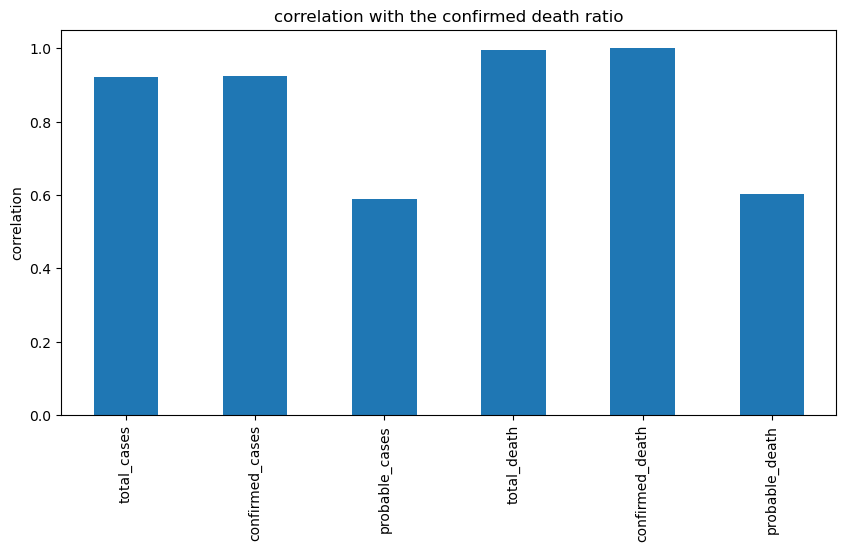

In [22]:
plt.figure(figsize=(10,5))
axes = covid19.corr()['confirmed_death'].plot(kind='bar',title='correlation with the confirmed death ratio')
axes.set_ylabel('correlation')

In [23]:
covid19.state = covid19.state.map({'AL':0,'MP':1,'ME':2,'VA':3,'DE':4,'FSM':5,'CO':6,'MI':7,'NYC':8,'NC':9,'PR':10,'MS':11,'KY':12,'TN':13,'ID':14,'OH':15,'WY':16,'CT':17,'WI':18,'MT':19,'IL':20,'OR':21,'AZ':22,'GA':23,'RMI':24,'UT':25,'MA':26,'OK':27,'NJ':28,'CA':29,'NE':30,})

In [24]:
covid19 ['state'].value_counts()

0     1001
1     1001
2     1001
3     1001
4     1001
5     1001
6     1001
7      962
8      961
9      960
10     959
11     959
12     956
13     950
14     917
15     917
16     917
17     914
18     913
19     913
20     913
21     913
22     913
23     912
24     912
25     911
26     820
27     776
28     661
29     634
30     407
Name: state, dtype: int64

In [25]:
covid19.min()

state              0.0
total_cases        0.0
confirmed_cases    0.0
probable_cases     0.0
total_death        0.0
confirmed_death    0.0
probable_death     0.0
dtype: float64

In [26]:
covid19.max()

state                   30.0
total_cases        4885289.0
confirmed_cases    4640489.0
probable_cases      763762.0
total_death          71408.0
confirmed_death      71408.0
probable_death        7889.0
dtype: float64

Text(0.5, 1.0, 'Ratio of confirmed death')

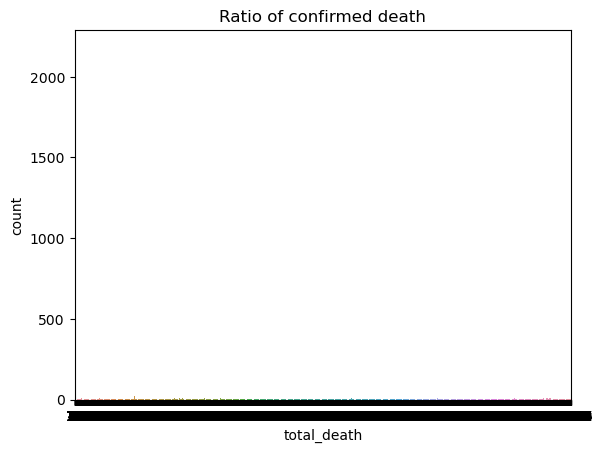

In [80]:
sns.countplot(data=covid19, x="total_death").set_title("Ratio of confirmed death")

In [81]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [82]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
X = covid19.drop(columns=['confirmed_death'],axis=1) 
y = covid19.confirmed_death

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [84]:
model1 = LogisticRegression(random_state=40)
model1.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [85]:
train_accuracy = model1.score(X_train, y_train)
test_accuracy = model1.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.04
Accuracy in Test  set   : 0.04


In [87]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [88]:
X = covid19.drop(columns=['confirmed_death'],axis=1) 
y = covid19.confirmed_death

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [89]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [90]:
train_accuracy = model2.score(X_train, y_train)
test_accuracy = model2.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 1.00
Accuracy in Test  set   : 1.00


In [92]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [93]:
model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [94]:
train_accuracy = model3.score(X_train, y_train)
test_accuracy = model3.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 1.00
Accuracy in Test  set   : 0.40


In [95]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
model4 = LinearSVC()
model4.fit(X_train, y_train)

In [ ]:
train_accuracy = model4.score(X_train, y_train)
test_accuracy = model4.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')